connection to Google Drive





In [4]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# @title
# import os

# # Define the directory path
# directory_path = "/content/drive/MyDrive/yemeni_music/extracted_audio_features_2"

# # Create a list to store the tree structure
# tree_structure = []

# # Function to print the tree paths
# def print_tree(path, level=0):
#     # List all files and directories in the given path
#     files_and_dirs = os.listdir(path)

#     for file_or_dir in files_and_dirs:
#         # Construct full path
#         full_path = os.path.join(path, file_or_dir)

#         # Add to tree structure with indentation based on level
#         tree_structure.append(f"{'|-- ' * level}{file_or_dir}")

#         # If it's a directory, recursively list its contents
#         if os.path.isdir(full_path):
#             print_tree(full_path, level + 1)

# # Print the tree structure of the content/data directory
# print_tree(directory_path)

# # # Output the tree structure
# tree_structure  # Show first 50 entries for brevity


In [ ]:
# @title
# import os
# import numpy as np

# def create_folder(folder_path):

#   if not os.path.exists(folder_path):
#     os.makedirs(folder_path)
#     print(f"Folder '{folder_path}' created successfully.")
#   else:
#     print(f"Folder '{folder_path}' already exists.")



# def merge_npy_files(folder_path, output_file):

#     npy_files = [f for f in os.listdir(folder_path) if f.endswith('.npy')]

#     arrays = []
#     for file in npy_files:
#         file_path = os.path.join(folder_path, file)
#         arr = np.load(file_path)
#         arrays.append(arr)

#     merged_array = np.concatenate(arrays, axis=0)
#     np.save(output_file, merged_array)

# t = ["5s", "10s", "15s", "20s", "25s", "30s"]
# h = ["chroma", "harmonic", "mfccs", "spectrogram", "tempo"]


# for i in t:
#   for j in h:
#     create_folder(f'/content/drive/MyDrive/yemeni_music/extracted_audio_features_2/adny/{j}')
#     folder_path = f'/content/drive/MyDrive/yemeni_music/extracted_audio_features/adny/{j}/{i}'
#     merge_npy_files(folder_path, f"/content/drive/MyDrive/yemeni_music/extracted_audio_features_2/adny/{j}/{i}.npy")
#     print("true")

In [ ]:
# @title
# import os

# def print_directory_tree(startpath):
#     for root, dirs, files in os.walk(startpath):
#         level = root.replace(startpath, '').count(os.sep)
#         indent = ' ' * 4 * level
#         print(f"{indent}{os.path.basename(root)}/")
#         subindent = ' ' * 4 * (level + 1)
#         for file in files[:5]:
#             print(f"{subindent}{file}")

# # Assuming the directory starts from the current folder or any specified path
# path = '/kaggle/input/adny-featrues-extraction-new'  # You can change this to the desired path
# print_directory_tree(path)


In [5]:
!pip install tensorflow

^C


In [6]:
import numpy as np
import pandas as pd
import os
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns



from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization, LSTM, Bidirectional, LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import logging
from collections import Counter
# TensorFlow and Keras Imports
import tensorflow as tf
from tensorflow.keras import layers, Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization, Input, GlobalAveragePooling1D, Activation, Add
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping



# NumPy for Data Manipulation
import numpy as np

# Keras Imports for VGG19
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

# Set up logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

def VGG16_1D(input_shape):
    model = Sequential()

    # First block
    model.add(Conv1D(filters=64, kernel_size=3, strides=1, padding='same', input_shape=input_shape, activation='relu'))
    model.add(Conv1D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
    model.add(MaxPooling1D(pool_size=2, strides=2, padding='same'))  # Added padding='same' to avoid shrinking

    # Second block
    model.add(Conv1D(filters=128, kernel_size=3, strides=1, padding='same', activation='relu'))
    model.add(Conv1D(filters=128, kernel_size=3, strides=1, padding='same', activation='relu'))
    model.add(MaxPooling1D(pool_size=2, strides=2, padding='same'))  # Added padding='same'

    # Third block
    model.add(Conv1D(filters=256, kernel_size=3, strides=1, padding='same', activation='relu'))
    model.add(Conv1D(filters=256, kernel_size=3, strides=1, padding='same', activation='relu'))
    model.add(Conv1D(filters=256, kernel_size=3, strides=1, padding='same', activation='relu'))
    model.add(MaxPooling1D(pool_size=2, strides=2, padding='same'))  # Added padding='same'

    # Flatten before Dense layers
    model.add(Flatten())

    # Fully connected layers
    model.add(Dense(units=2048, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(units=2048, activation='relu'))
    model.add(Dropout(0.5))

    # Output layer (adjust for the number of classes)
    model.add(Dense(units=len(np.unique(y_train)), activation='softmax'))

    return model



def AlexNet_1D(input_shape):
    model = Sequential()

    # First block
    model.add(Conv1D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=2, strides=2, padding='same'))  # Add padding='same' to avoid shrinking

    # Second block
    model.add(Conv1D(filters=192, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling1D(pool_size=2, strides=2, padding='same'))  # Add padding='same'

    # Third block

    model.add(Conv1D(filters=384, kernel_size=3, padding='same', activation='relu'))
    model.add(Conv1D(filters=256, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling1D(pool_size=2, strides=2, padding='same'))  # Add padding='same'

    # Flatten before Dense layers
    model.add(Flatten())

    # Fully connected layers
    model.add(Dense(2048, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(2048, activation='relu'))
    model.add(Dropout(0.5))

    # Output layer
    model.add(Dense(len(np.unique(y_train)) , activation='softmax'))

    return model

from tensorflow.keras.layers import Input



############################################################################################
#                                                VGG19                                  #
############################################################################################
def VGG19_1D(input_shape):
    input_layer = Input(shape=input_shape)

    # Block 1
    x = Conv1D(filters=64, kernel_size=3, padding='same', activation='relu')(input_layer)
    x = Conv1D(filters=64, kernel_size=3, padding='same', activation='relu')(x)
    x = MaxPooling1D(pool_size=2, strides=2, padding='same')(x)

    # Block 2
    x = Conv1D(filters=128, kernel_size=3, padding='same', activation='relu')(x)
    x = Conv1D(filters=128, kernel_size=3, padding='same', activation='relu')(x)
    x = MaxPooling1D(pool_size=2, strides=2, padding='same')(x)

    # Block 3
    x = Conv1D(filters=256, kernel_size=3, padding='same', activation='relu')(x)
    x = Conv1D(filters=256, kernel_size=3, padding='same', activation='relu')(x)
    x = Conv1D(filters=256, kernel_size=3, padding='same', activation='relu')(x)
    x = MaxPooling1D(pool_size=2, strides=2, padding='same')(x)

    # Block 4
    x = Conv1D(filters=512, kernel_size=3, padding='same', activation='relu')(x)
    x = Conv1D(filters=512, kernel_size=3, padding='same', activation='relu')(x)
    x = Conv1D(filters=512, kernel_size=3, padding='same', activation='relu')(x)
    x = MaxPooling1D(pool_size=2, strides=2, padding='same')(x)

    # Block 5
    x = Conv1D(filters=512, kernel_size=3, padding='same', activation='relu')(x)
    x = Conv1D(filters=512, kernel_size=3, padding='same', activation='relu')(x)
    x = Conv1D(filters=512, kernel_size=3, padding='same', activation='relu')(x)
    x = MaxPooling1D(pool_size=2, strides=2, padding='same')(x)

    # Block 6 - Fully connected layers
    x = Flatten()(x)
    x = Dense(units=2048, activation='relu')(x)
    x = Dropout(rate=0.2)(x)
    x = Dense(units=2048, activation='relu')(x)
    x = Dropout(rate=0.2)(x)
    x = Dense(units=len(np.unique(y_train)) , activation='softmax')(x)

    model = Model(inputs=input_layer, outputs=x, name='VGG19_1D')
    return model



############################################################################################
#                                                Resent50                                  #
############################################################################################
# Define 1D Convolutional Block
def conv_block_1d(x, filters, kernel_size, strides, padding='same'):
    x = Conv1D(filters=filters, kernel_size=kernel_size, strides=strides, padding=padding)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    return x

# Identity Block for ResNet
def identity_block_1d(x, filters):
    shortcut = x
    x = conv_block_1d(x, filters=filters, kernel_size=1, strides=1)
    x = conv_block_1d(x, filters=filters, kernel_size=3, strides=1)
    x = Conv1D(filters=filters * 4, kernel_size=1)(x)
    x = BatchNormalization()(x)
    x = Add()([x, shortcut])
    x = Activation('relu')(x)
    return x

# Projection Block for ResNet
def projection_block_1d(x, filters, strides):
    shortcut = x
    x = conv_block_1d(x, filters=filters, kernel_size=1, strides=strides)
    x = conv_block_1d(x, filters=filters, kernel_size=3, strides=1)
    x = Conv1D(filters=filters * 4, kernel_size=1)(x)
    x = BatchNormalization()(x)
    shortcut = Conv1D(filters=filters * 4, kernel_size=1, strides=strides)(shortcut)
    shortcut = BatchNormalization()(shortcut)
    x = Add()([x, shortcut])
    x = Activation('relu')(x)
    return x

# Define ResNet50 1D
def ResNet50_1D(input_shape):
    inputs = Input(shape=input_shape)

    # Initial conv layer
    x = conv_block_1d(inputs, filters=64, kernel_size=7, strides=2, padding='same')
    x = MaxPooling1D(pool_size=3, strides=2, padding='same')(x)

    # Conv block 1
    x = projection_block_1d(x, filters=64, strides=1)
    x = identity_block_1d(x, filters=64)
    x = identity_block_1d(x, filters=64)

    # Conv block 2
    x = projection_block_1d(x, filters=128, strides=2)
    x = identity_block_1d(x, filters=128)
    x = identity_block_1d(x, filters=128)
    x = identity_block_1d(x, filters=128)

    # Conv block 3
    x = projection_block_1d(x, filters=256, strides=2)
    x = identity_block_1d(x, filters=256)
    x = identity_block_1d(x, filters=256)
    x = identity_block_1d(x, filters=256)
    x = identity_block_1d(x, filters=256)
    x = identity_block_1d(x, filters=256)

    # Conv block 4
    x = projection_block_1d(x, filters=512, strides=2)
    x = identity_block_1d(x, filters=512)
    x = identity_block_1d(x, filters=512)

    # Global average pooling and dense layer
    x = GlobalAveragePooling1D()(x)
    outputs = Dense(len(np.unique(y_train)) , activation='softmax')(x)

    model = Model(inputs=inputs, outputs=outputs)
    return model


############################################################################################
#                          MobileNet
############################################################################################
# Define the MobileNet model
def mobilenet(input_shape):
    # Input layer
    inputs = tf.keras.Input(shape=input_shape)

    # Convolutional layers
    x = layers.Conv2D(32, (3, 3), strides=(2, 2), padding='same')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    # Depthwise separable convolutions
    x = layers.DepthwiseConv2D((3, 3), padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.Conv2D(64, (1, 1), padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    x = layers.DepthwiseConv2D((3, 3), strides=(2, 2), padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.Conv2D(128, (1, 1), padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    x = layers.DepthwiseConv2D((3, 3), padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.Conv2D(128, (1, 1), padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    x = layers.DepthwiseConv2D((3, 3), strides=(2, 2), padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.Conv2D(256, (1, 1), padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    x = layers.DepthwiseConv2D((3, 3), padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.Conv2D(256, (1, 1), padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    x = layers.DepthwiseConv2D((3, 3), strides=(2, 2), padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.Conv2D(512, (1, 1), padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    for _ in range(5):
        x = layers.DepthwiseConv2D((3, 3), padding='same')(x)
        x = layers.BatchNormalization()(x)
        x = layers.ReLU()(x)
        x = layers.Conv2D(512, (1, 1), padding='same')(x)
        x = layers.BatchNormalization()(x)
        x = layers.ReLU()(x)

    x = layers.DepthwiseConv2D((3, 3), strides=(2, 2), padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.Conv2D(1024, (1, 1), padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    x = layers.GlobalAveragePooling2D()(x)

    # Output layer
    outputs = layers.Dense(len(np.unique(y_train)) , activation='softmax')(x)

    # Create the model
    model = tf.keras.Model(inputs=inputs, outputs=outputs)

    return model



############################################################################################
############################################################################################
import tensorflow as tf
from tensorflow.keras import layers

# Define the MobileNet 1D model
def mobilenet_1d(input_shape):
    # Input layer
    inputs = tf.keras.Input(shape=input_shape)

    # Convolutional layers
    x = layers.Conv1D(32, 3, strides=2, padding='same')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    # Depthwise separable convolutions
    x = layers.SeparableConv1D(64, 3, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    x = layers.SeparableConv1D(128, 3, strides=2, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    x = layers.SeparableConv1D(128, 3, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    x = layers.SeparableConv1D(256, 3, strides=2, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    x = layers.SeparableConv1D(256, 3, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    x = layers.SeparableConv1D(512, 3, strides=2, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    for _ in range(5):
        x = layers.SeparableConv1D(512, 3, padding='same')(x)
        x = layers.BatchNormalization()(x)
        x = layers.ReLU()(x)

    x = layers.SeparableConv1D(1024, 3, strides=2, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    # Global average pooling
    x = layers.GlobalAveragePooling1D()(x)

    # Output layer
    outputs = layers.Dense( len(np.unique(y_train)) , activation='softmax')(x)

    # Create the model
    model = tf.keras.Model(inputs=inputs, outputs=outputs)

    return model
############################################################################################
############################################################################################

In [4]:


# Define helper functions
def save_classification_report(report, folder, filename):
    if not os.path.exists(folder):
        os.makedirs(folder)
    with open(os.path.join(folder, filename), 'w') as f:
        f.write(report)

def save_plot(fig, folder, filename):
    if not os.path.exists(folder):
        os.makedirs(folder)
    fig.savefig(os.path.join(folder, filename), dpi=300)  # Save plots with high resolution (300 DPI)

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import logging

def plot_label_distribution(y, label_names, experiment_folder, stage="before"):
    label_counts = np.bincount(y)

    # Create the plot with a professional style
    sns.set(style="whitegrid")
    fig, ax = plt.subplots(figsize=(12, 8))  # Large figure size for better readability

    # Create a custom color palette
    colors = sns.color_palette("Set2", len(label_names))

    # Create the bar plot with enhanced style
    bars = sns.barplot(x=label_names, y=label_counts, ax=ax, palette=colors, edgecolor='black')

    # Add annotations to the bars (number of samples)
    for bar, count in zip(bars.patches, label_counts):
        ax.annotate(f'{count}',
                    (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                    ha='center', va='center', size=12, xytext=(0, 8),
                    textcoords='offset points', color='black', weight='bold')

    # Customize the grid, labels, and title for a professional look
    ax.grid(True, which='major', linestyle='--', linewidth=0.75)
    ax.set_axisbelow(True)
    ax.set_title(f"Label Distribution {stage.capitalize()} Undersampling", fontsize=18, weight='bold')
    ax.set_ylabel("Count", fontsize=14)
    ax.set_xlabel("Labels", fontsize=14)

    # Rotate the x-axis labels for better readability (especially for longer labels)
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.yticks(fontsize=12)

    # Add a tight layout to make sure everything fits well
    plt.tight_layout()

    # Log the number of samples for each label
    for label, count in zip(label_names, label_counts):
        logging.info(f"{label}: {count} samples")

    # Save the plot in high resolution (300 DPI)
    save_plot(fig, experiment_folder, f'label_distribution_{stage}.png', dpi=300)

def undersample_data(X, y):
    counter = Counter(y)
    min_count = min(counter.values())
    logging.info(f"Minimum samples across all labels: {min_count}")

    indices_to_keep = []
    for label in np.unique(y):
        label_indices = np.where(y == label)[0]
        selected_indices = np.random.choice(label_indices, min_count, replace=False)
        indices_to_keep.extend(selected_indices)

    X_balanced = X[indices_to_keep]
    y_balanced = y[indices_to_keep]
    return X_balanced, y_balanced

def train_and_evaluate_model(model, model_name, X_train, X_test, y_train, y_test, experiment_folder, label_names):
    logging.info(f"Training {model_name} model...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, target_names=label_names)
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Save classification report
    save_classification_report(report, experiment_folder, f'{model_name}_classification_report.txt')

    # Save confusion matrix plot
    fig, ax = plt.subplots(figsize=(10, 8))  # Increase the size of the confusion matrix plot
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', ax=ax,
                xticklabels=label_names, yticklabels=label_names)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')
    ax.set_title(f'{model_name} Confusion Matrix')
    save_plot(fig, experiment_folder, f'{model_name}_confusion_matrix.png')

    accuracy = model.score(X_test, y_test)
    logging.info(f"{model_name} Accuracy: {accuracy:.4f}")
    print(f"{model_name} Accuracy: {accuracy:.4f}")



import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

def save_plot(fig, folder, filename, dpi=300):
    if not os.path.exists(folder):
        os.makedirs(folder)
    # Save the figure with high resolution (default: 300 DPI)
    fig.savefig(os.path.join(folder, filename), dpi=dpi)


import os
import logging
from tensorflow.keras.models import save_model as keras_save_model  # Import for saving full Keras model

def save_model(model, model_name, folder):
    """
    Save the full model.

    Arguments:
    - model: The trained model object (TensorFlow/Keras in this case).
    - model_name: Name of the model (for filename).
    - folder: Directory where the model should be saved.
    """
    if not os.path.exists(folder):
        os.makedirs(folder)

    model_path = os.path.join(folder, model_name)

    # Save the entire model (architecture + weights) as an H5 file
#     keras_save_model(model, model_path + '.h5')
    logging.info(f"Keras model saved at {model_path}.h5")


def train_and_evaluate_dl_model(model, model_name, X_train, X_test, y_train, y_test, experiment_folder, label_names, epochs=250, patience=15, batch_size=16):
    early_stopping = EarlyStopping(monitor='val_loss', patience=patience, restore_best_weights=True)

    history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test)  , callbacks=[early_stopping] , batch_size=batch_size)
    y_pred = np.argmax(model.predict(X_test), axis=1)
    report = classification_report(y_test, y_pred, target_names=label_names)
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Save classification report
    save_classification_report(report, experiment_folder, f'{model_name}_classification_report.txt')

    # Save confusion matrix plot
    fig, ax = plt.subplots(figsize=(10, 8))  # Increase the size of the confusion matrix plot
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', ax=ax,
                xticklabels=label_names, yticklabels=label_names)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')
    ax.set_title(f'{model_name} Confusion Matrix')
    save_plot(fig, experiment_folder, f'{model_name}_confusion_matrix.png', dpi=300)  # High resolution

    # Save separate loss plot
    fig, ax = plt.subplots(figsize=(12, 8))
    ax.plot(history.history['loss'], label='Training Loss')
    ax.plot(history.history['val_loss'], label='Validation Loss')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Loss')
    ax.set_title(f'{model_name} Loss')
    ax.legend()
    save_plot(fig, experiment_folder, f'{model_name}_loss_plot.png', dpi=300)  # High resolution

    # Save separate accuracy plot
    fig, ax = plt.subplots(figsize=(12, 8))
    ax.plot(history.history['accuracy'], label='Training Accuracy')
    ax.plot(history.history['val_accuracy'], label='Validation Accuracy')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Accuracy')
    ax.set_title(f'{model_name} Accuracy')
    ax.legend()
    save_plot(fig, experiment_folder, f'{model_name}_accuracy_plot.png', dpi=300)  # High resolution

    accuracy = model.evaluate(X_test, y_test, verbose=0)[1]
    logging.info(f"{model_name} Accuracy: {accuracy:.4f}")
    print(f"{model_name} Accuracy: {accuracy:.4f}")

    # Save the model's weights for later use
    model.save_weights(f'{experiment_folder}/{model_name}_weights.weights.h5')
    logging.info(f"Weights for {model_name} saved at {experiment_folder}/{model_name}_weights.weights.h5")

    # Save the full model (architecture + weights)
    save_model(model, model_name, experiment_folder)


ModuleNotFoundError: No module named 'tensorflow'

In [12]:
# prompt: /content/drive/MyDrive/yemeni_music/app/features_30s.npy /content/drive/MyDrive/yemeni_music/app/labels_30s.npy

import numpy as np

features = np.load('/content/drive/MyDrive/yemeni_music/app/features_30s.npy')
labels = np.load('/content/drive/MyDrive/yemeni_music/app/labels_30s.npy')
print(features.shape)
print(labels.shape)



(4461, 40)
(4461,)


In [13]:
# prompt: show the labels
# pleases remove the last _10s from every labels

new_labels = []
for label in labels:
  new_label = label.replace('_10s', '')
  new_labels.append(new_label)

print(new_labels)


['hdramy', 'hdramy', 'hdramy', 'hdramy', 'hdramy', 'hdramy', 'hdramy', 'hdramy', 'hdramy', 'hdramy', 'hdramy', 'hdramy', 'hdramy', 'hdramy', 'hdramy', 'hdramy', 'hdramy', 'hdramy', 'hdramy', 'hdramy', 'hdramy', 'hdramy', 'hdramy', 'hdramy', 'hdramy', 'hdramy', 'hdramy', 'hdramy', 'hdramy', 'hdramy', 'hdramy', 'hdramy', 'hdramy', 'hdramy', 'hdramy', 'hdramy', 'hdramy', 'hdramy', 'hdramy', 'hdramy', 'hdramy', 'hdramy', 'hdramy', 'hdramy', 'hdramy', 'hdramy', 'hdramy', 'hdramy', 'hdramy', 'hdramy', 'hdramy', 'hdramy', 'hdramy', 'hdramy', 'hdramy', 'hdramy', 'hdramy', 'hdramy', 'hdramy', 'hdramy', 'hdramy', 'hdramy', 'hdramy', 'hdramy', 'hdramy', 'hdramy', 'hdramy', 'hdramy', 'hdramy', 'hdramy', 'hdramy', 'hdramy', 'hdramy', 'hdramy', 'hdramy', 'hdramy', 'hdramy', 'hdramy', 'hdramy', 'hdramy', 'hdramy', 'hdramy', 'hdramy', 'hdramy', 'hdramy', 'hdramy', 'hdramy', 'hdramy', 'hdramy', 'hdramy', 'hdramy', 'hdramy', 'hdramy', 'hdramy', 'hdramy', 'hdramy', 'hdramy', 'hdramy', 'hdramy', 'hdramy',

(4461, 40)
(4461,)


<ipython-input-11-a0aebc9f5c08>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=label_names, y=label_counts, ax=ax, palette=colors, edgecolor='black')
<ipython-input-11-a0aebc9f5c08>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=label_names, y=label_counts, ax=ax, palette=colors, edgecolor='black')


XGBoost Model Accuracy: 97.76%
Epoch 1/250
223/223 ━━━━━━━━━━━━━━━━━━━━ 16s 23ms/step - accuracy: 0.2320 - loss: 1.7826 - val_accuracy: 0.2172 - val_loss: 1.5933
Epoch 2/250
223/223 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - accuracy: 0.2992 - loss: 1.4926 - val_accuracy: 0.4905 - val_loss: 1.1997
Epoch 3/250
223/223 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.4940 - loss: 1.1742 - val_accuracy: 0.4860 - val_loss: 1.2077
Epoch 4/250
223/223 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5207 - loss: 1.1455 - val_accuracy: 0.5767 - val_loss: 0.9878
Epoch 5/250
223/223 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5691 - loss: 1.0119 - val_accuracy: 0.5566 - val_loss: 1.0868
Epoch 6/250
223/223 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5555 - loss: 1.0510 - val_accuracy: 0.5655 - val_loss: 1.0137
Epoch 7/250
223/223 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6087 - loss: 0.9472 - val_accuracy: 0.6685 - val_loss: 0.9087
Epoch 8/250
223/223 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accur

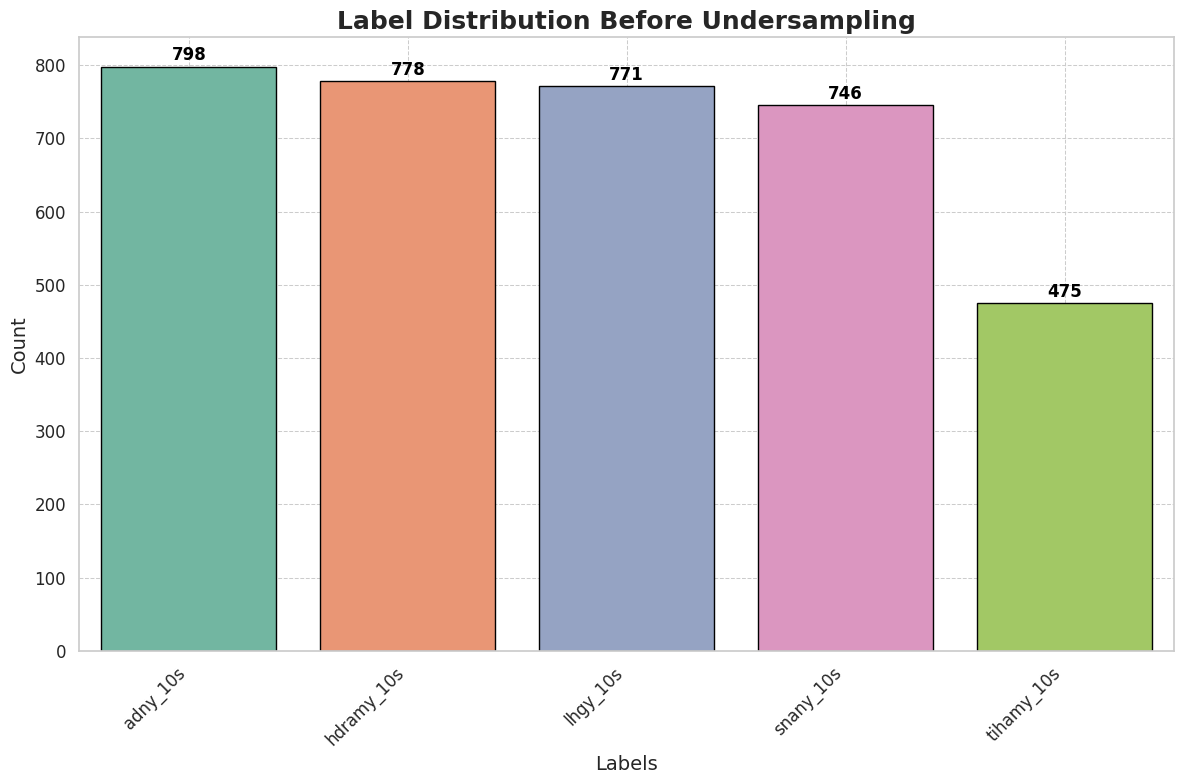

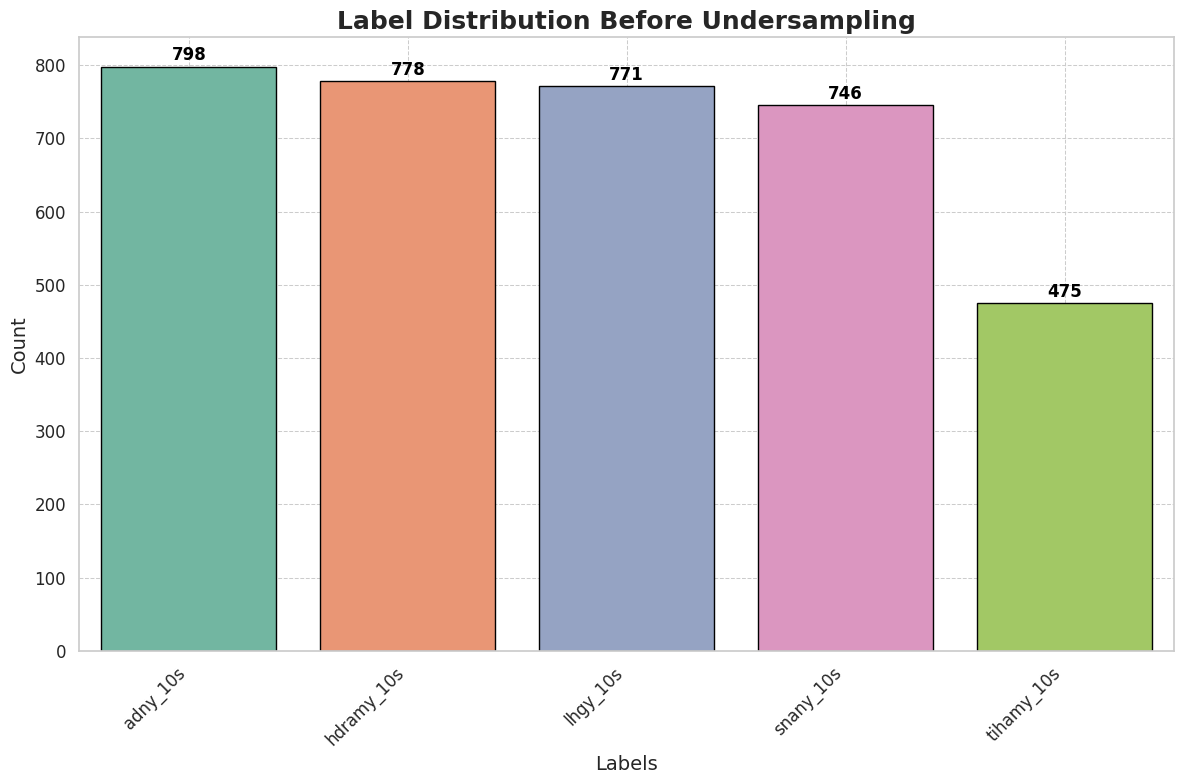

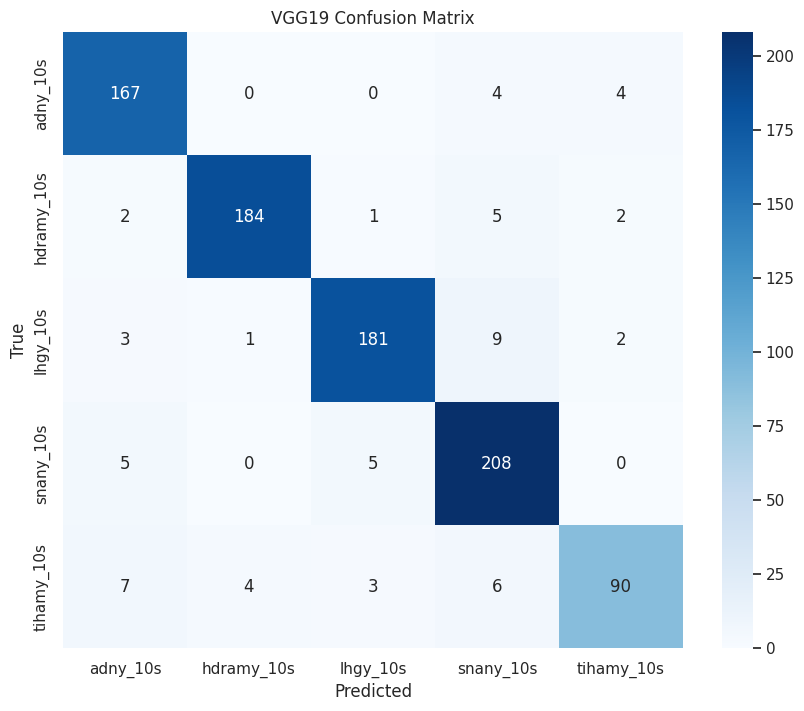

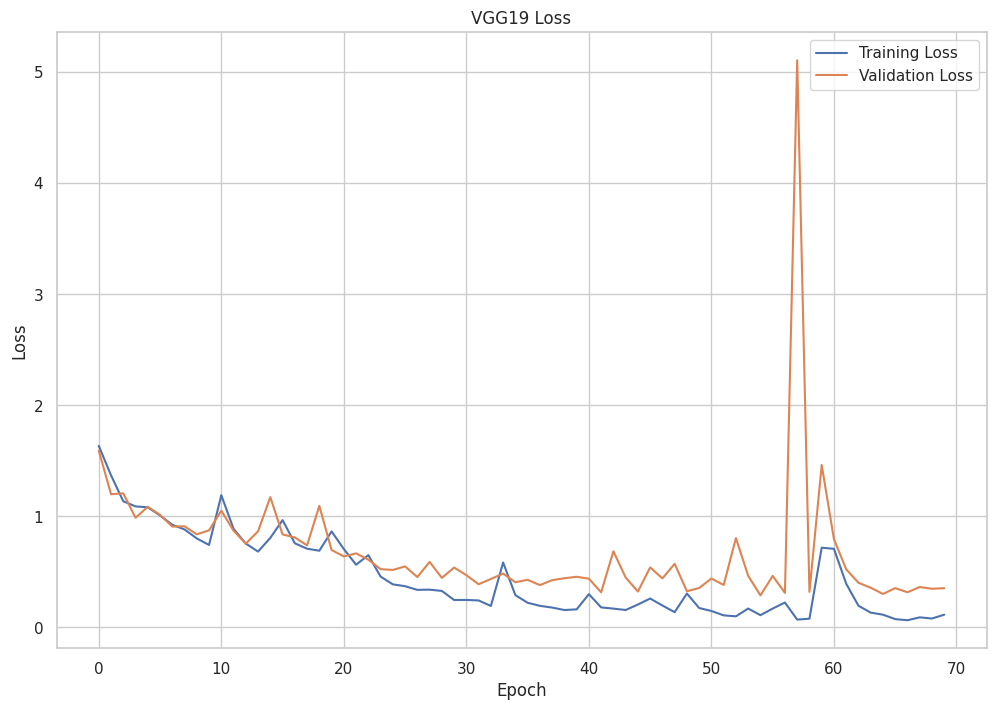

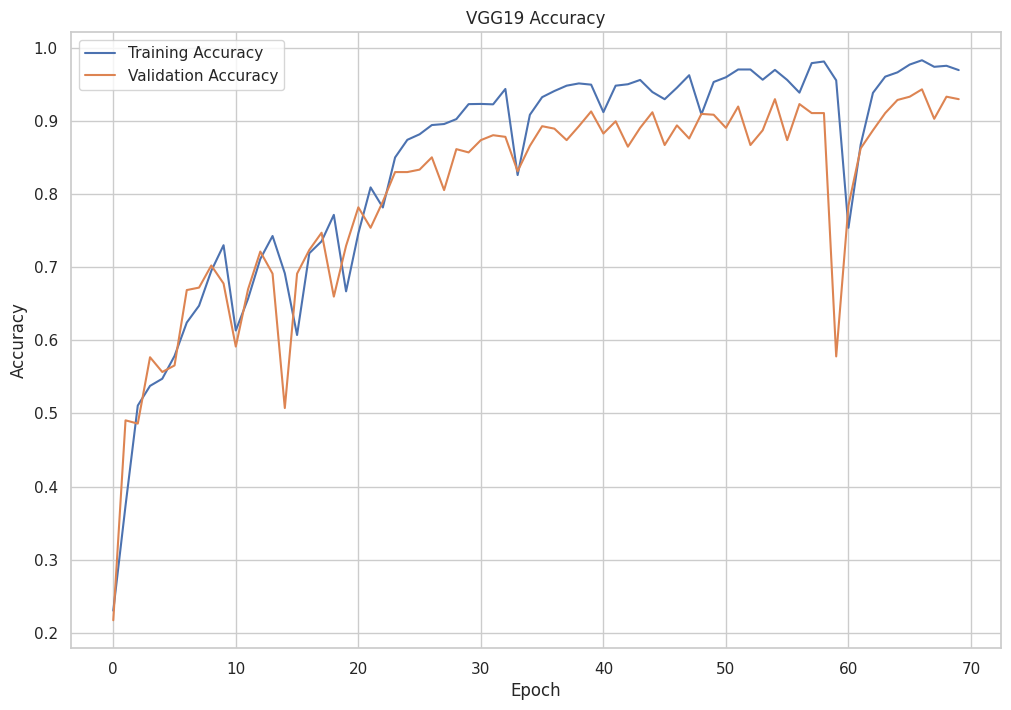

In [14]:
import os
import numpy as np
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
import logging

# Load features and labels
features = np.load('/content/drive/MyDrive/yemeni_music/app/features_30s.npy')
labels = np.load('/content/drive/MyDrive/yemeni_music/app/labels_30s.npy')
print(features.shape)
print(labels.shape)

# Ensure variable names are consistent
X_combined = features
y_combined = labels

# Convert labels (music types) into a format usable by models
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_combined)
label_names = label_encoder.inverse_transform(np.unique(y_encoded))

# Reshape X to be a 2D array (n_samples, n_features) for XGBoost
if X_combined.ndim == 3:  # If X is 3D (e.g., [n_samples, n_time_steps, n_features]), reshape to 2D
    n_samples, n_time_steps, n_features = X_combined.shape
    X_combined = X_combined.reshape(n_samples, n_time_steps * n_features)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_combined, y_encoded, test_size=0.2, random_state=42)

# Create a folder for saving results
experiment_folder = "/content/drive/MyDrive/yemeni_music/results"
if not os.path.exists(experiment_folder):
    os.makedirs(experiment_folder)

# Optional: You can implement a function to plot label distribution before and after undersampling
# Example:
plot_label_distribution(y_train, label_names, f'{experiment_folder}/before_undersampling')

# Function for undersampling (define your own method based on the task)
# For now, assuming a placeholder function
def undersample_data(X, y):
    # Placeholder: return data without any modification
    return X, y

# Perform undersampling to balance the dataset
X_train, y_train = undersample_data(X_train, y_train)

# Optional: Plot label distribution after undersampling
plot_label_distribution(y_train, label_names, f'{experiment_folder}/after_undersampling')

# Example XGBoost model
xgb_model = xgb.XGBClassifier(n_estimators=100, random_state=42)

# Train and evaluate XGBoost model
xgb_model.fit(X_train, y_train)
xgb_score = xgb_model.score(X_test, y_test)
print(f'XGBoost Model Accuracy: {xgb_score * 100:.2f}%')

# Prepare data for deep learning models (reshape for 1D CNN)
X_train_dl = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_dl = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Number of epochs for training deep learning models
epochs = 250


# Training different models
VGG19_model = VGG19_1D(input_shape=(X_train_dl.shape[1], 1))
VGG19_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
train_and_evaluate_dl_model(VGG19_model, 'VGG19', X_train_dl, X_test_dl, y_train, y_test, experiment_folder, label_names, epochs)


In [20]:
def VGG19_1D(input_shape):
    input_layer = Input(shape=input_shape)

    # Block 1
    x = Conv1D(filters=64, kernel_size=3, padding='same', activation='relu')(input_layer)
    x = Conv1D(filters=64, kernel_size=3, padding='same', activation='relu')(x)
    x = MaxPooling1D(pool_size=2, strides=2, padding='same')(x)

    # Block 2
    x = Conv1D(filters=128, kernel_size=3, padding='same', activation='relu')(x)
    x = Conv1D(filters=128, kernel_size=3, padding='same', activation='relu')(x)
    x = MaxPooling1D(pool_size=2, strides=2, padding='same')(x)

    # Block 3
    x = Conv1D(filters=256, kernel_size=3, padding='same', activation='relu')(x)
    x = Conv1D(filters=256, kernel_size=3, padding='same', activation='relu')(x)
    x = Conv1D(filters=256, kernel_size=3, padding='same', activation='relu')(x)
    x = MaxPooling1D(pool_size=2, strides=2, padding='same')(x)

    # Block 4
    x = Conv1D(filters=512, kernel_size=3, padding='same', activation='relu')(x)
    x = Conv1D(filters=512, kernel_size=3, padding='same', activation='relu')(x)
    x = Conv1D(filters=512, kernel_size=3, padding='same', activation='relu')(x)
    x = MaxPooling1D(pool_size=2, strides=2, padding='same')(x)

    # Block 5
    x = Conv1D(filters=512, kernel_size=3, padding='same', activation='relu')(x)
    x = Conv1D(filters=512, kernel_size=3, padding='same', activation='relu')(x)
    x = Conv1D(filters=512, kernel_size=3, padding='same', activation='relu')(x)
    x = MaxPooling1D(pool_size=2, strides=2, padding='same')(x)

    # Block 6 - Fully connected layers
    x = Flatten()(x)
    x = Dense(units=2048, activation='relu')(x)
    x = Dropout(rate=0.2)(x)
    x = Dense(units=2048, activation='relu')(x)
    x = Dropout(rate=0.2)(x)
    x = Dense(units=5 , activation='softmax')(x)

    model = Model(inputs=input_layer, outputs=x, name='VGG19_1D')
    return model



In [21]:
def load_trained_model_weights(model, model_name, experiment_folder):
    """
    Load the weights of a trained model from a specified folder.

    Args:
    - model: The model architecture into which the weights will be loaded.
    - model_name: The name of the model (used to locate the weights file).
    - experiment_folder: The folder where the model's weights are saved.

    Returns:
    - model: The model with loaded weights.
    """
    # Path to the saved weights
    weights_path = f'{experiment_folder}/{model_name}_weights.weights.h5'

    # Load the weights into the model
    model.load_weights(weights_path)
    logging.info(f"Weights for {model_name} loaded from {weights_path}")

    return model
# Assuming you've already defined the VGG19_1D model architecture
input_shape = (X_train_dl.shape[1], 1)  # Adjust based on your feature size
num_classes = len(np.unique(y_train))

# Create the model architecture
vgg19_model = VGG19_1D(input_shape=input_shape)# num_classes=num_classes)

# Load the saved weights
experiment_folder = '/content/drive/MyDrive/yemeni_music/results'
model_name = 'VGG19'
vgg19_model = load_trained_model_weights(vgg19_model, model_name, experiment_folder)

# Now you can use the model for predictions
# Example of making a prediction
input_feature = X_test_dl[0].reshape(1, X_test_dl.shape[1], 1)  # Reshape a single input for prediction
predicted_label = np.argmax(vgg19_model.predict(input_feature), axis=-1)
decoded_label = label_encoder.inverse_transform(predicted_label)

print(f"Predicted label: {decoded_label[0]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step
Predicted label: snany_10s


In [23]:
# prompt: save the labels encoder label_encoder

import pickle

# Save the LabelEncoder
with open(f'/content/drive/MyDrive/yemeni_music/label_encoder.pkl', 'wb') as f:
    pickle.dump(label_encoder, f)


In [15]:
def predict_with_dl_model(model, input_feature):
    """
    This function takes a trained deep learning model and a single input feature to make a prediction.

    Args:
    - model: Trained deep learning model (e.g., CNN).
    - input_feature: A single input feature (1D array of the same shape as training features).

    Returns:
    - predicted_label: The predicted label.
    """
    # Ensure the input is 2D and add a channel dimension for 1D CNN models
    if input_feature.ndim == 1:
        input_feature = input_feature.reshape(1, input_feature.shape[0], 1)

    # Make a prediction (the model typically outputs probabilities for each class)
    predicted_probabilities = model.predict(input_feature)

    # Get the predicted class (the class with the highest probability)
    predicted_label_encoded = np.argmax(predicted_probabilities, axis=1)

    # Decode the label back to the original format
    predicted_label = label_encoder.inverse_transform(predicted_label_encoded)

    return predicted_label[0]  # Return the first and only prediction
# Example input from feature extraction (one item)
input_feature = features[0]  # Assume you are using the first item in the feature extraction

# For deep learning model prediction:
# Make sure your deep learning model is loaded or passed into the function
# e.g., vgg16_model = load_model('path_to_vgg16_model')
predicted_label_dl = predict_with_dl_model(VGG19_model, input_feature)
print(f"Deep Learning Predicted Label: {predicted_label_dl}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Deep Learning Predicted Label: hdramy_10s


In [ ]:
import shutil

# Specify the folder path and the zip file output path
folder_to_zip = '/kaggle/working/results/chroma_5s'
output_zip_file = '/kaggle/working/chroma_5s.zip'

# Create a zip file of the folder
shutil.make_archive(output_zip_file.replace('.zip', ''), 'zip', folder_to_zip)

print(f'Folder {folder_to_zip} has been zipped and saved as {output_zip_file}')


In [ ]:
# times = ["5s", "10s", "15s", "20s", "25s", "30s"]
# labels = ["chroma", "harmonic", "mfccs", "spectrogram", "tempo"]
# for i in times:
#   for j in labels:
#     create_folder(f'/content/drive/MyDrive/yemeni_music/extracted_audio_features_2/adny/{j}')
#     folder_path = f'/content/drive/MyDrive/yemeni_music/extracted_audio_features/adny/{j}/{i}'
#     load file f"/content/drive/MyDrive/yemeni_music/extracted_audio_features_2/adny/{j}/{i}.npy")
#     print("true")


# for (feature_type, time_segment), experiment_df in tqdm(experiments, desc="Running Experiments"):
#     try:
#         print(f"Running experiment with Feature: {feature_type}, Time Segment: {time_segment}")

#         # Load the data for the current experiment
#         X = [np.load(row['file_path']) for _, row in experiment_df.iterrows()]  # Load features from .npy files
#         y = experiment_df['music_type'].values  # Music types act as labels

#         # Convert labels (music types) into a format usable by models
#         label_encoder = LabelEncoder()
#         y_encoded = label_encoder.fit_transform(y)
#         label_names = label_encoder.inverse_transform(np.unique(y_encoded))

#         # Reshape X to be a 2D array (n_samples, n_features) for XGBoost
#         X = np.array(X)
#         if X.ndim == 3:  # If X is 3D (e.g., [n_samples, n_time_steps, n_features]), reshape it to 2D
#             n_samples, n_time_steps, n_features = X.shape
#             X = X.reshape(n_samples, n_time_steps * n_features)  # Flatten the time steps for each sample

#         # Split data into training and testing sets
#         X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

#         # Plot and save label distribution before undersampling
#         plot_label_distribution(y_train, label_names, f'/content/drive/MyDrive/yemeni_music/results/{feature_type}_{time_segment}/before_undersampling')

#         # Perform undersampling to balance the dataset
#         X_train, y_train = undersample_data(X_train, y_train)

#         # Plot and save label distribution after undersampling
#         plot_label_distribution(y_train, label_names, f'/content/drive/MyDrive/yemeni_music/results/{feature_type}_{time_segment}/after_undersampling')

#         # Define experiment folder for saving results
#         experiment_folder = f"/content/drive/MyDrive/yemeni_music/results/{feature_type}_{time_segment}"
#         if not os.path.exists(experiment_folder):
#             os.makedirs(experiment_folder)

#         # Example ML models (XGBoost)
#         ml_models = {
#             "XGBoost": xgb.XGBClassifier(n_estimators=100, random_state=42)
#         }

#         # Prepare data for CNN and other deep learning models
#         X_train_dl = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
#         X_test_dl = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

#         # AlexNet Model for 1D data
#         epochs = 250
#         VGG19_1D_model = VGG19_1D(input_shape=(X_train_dl.shape[1], 1))
#         VGG19_1D_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#         train_and_evaluate_dl_model(VGG19_1D_model, 'VGG19', X_train_dl, X_test_dl, y_train, y_test, experiment_folder, label_names, epochs=epochs)

#         # VGG16 Model for 1D data
#         vgg16_1d_model = VGG16_1D(input_shape=(X_train_dl.shape[1], 1))
#         vgg16_1d_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#         train_and_evaluate_dl_model(vgg16_1d_model, 'VGG16', X_train_dl, X_test_dl, y_train, y_test, experiment_folder, label_names, epochs=epochs)

#         # MobileNet Model for 1D data
#         mobilenet_1d_model = mobilenet_1d(input_shape=(X_train_dl.shape[1], 1))
#         mobilenet_1d_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#         train_and_evaluate_dl_model(mobilenet_1d_model, 'Mobilenet', X_train_dl, X_test_dl, y_train, y_test, experiment_folder, label_names, epochs=epochs)

#         # ResNet50 Model for 1D data
#         ResNet50_1D_model = ResNet50_1D(input_shape=(X_train_dl.shape[1], 1))
#         ResNet50_1D_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#         train_and_evaluate_dl_model(ResNet50_1D_model, 'ResNet50', X_train_dl, X_test_dl, y_train, y_test, experiment_folder, label_names, epochs=epochs)

#         # AlexNet Model for 1D data
#         alexnet_1d_model = AlexNet_1D(input_shape=(X_train_dl.shape[1], 1))
#         alexnet_1d_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#         train_and_evaluate_dl_model(alexnet_1d_model, 'AlexNet', X_train_dl, X_test_dl, y_train, y_test, experiment_folder, label_names, epochs=epochs)

#         for model_name, model in ml_models.items():
#             train_and_evaluate_model(model, model_name, X_train, X_test, y_train, y_test, experiment_folder, label_names)

#     except Exception as e:
#         logging.error(f"Error occurred during experiment with Feature: {feature_type}, Time Segment: {time_segment}")
#         logging.error(f"Error details: {str(e)}")
#         continue  # Skip to the next experiment if an error occurs


In [ ]:


# WE WANT to make take the five type of music for that have same featrues names and have same times

# # Iterate through each dataset and run experiments
# for experiment, paths in tqdm(datasets.items(), desc="Running experiments"):
#     logging.info(f"Running experiment for {experiment} segments...")

#     # Load data
#     X_train = np.load(paths["features"])
#     y_train = np.load(paths["labels"])
#     # Remove '_10s' and capitalize the first letter of each label
#     y_train = np.array([label.replace('_10s', '').capitalize() for label in y_train])

#     # Split data into train and test sets
#     X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

#     # Convert label indices to human-readable labels
#     label_encoder = LabelEncoder()
#     y_train = label_encoder.fit_transform(y_train)
#     y_test = label_encoder.transform(y_test)
#     label_names = label_encoder.inverse_transform(np.unique(y_train))

#     # Plot and save label distribution before undersampling
#     plot_label_distribution(y_train, label_names, f'results/{experiment}/before_undersampling')

#     # Perform undersampling to balance the dataset
#     X_train, y_train = undersample_data(X_train, y_train)


#     # Plot and save label distribution after undersampling
#     plot_label_distribution(y_train, label_names, f'results/{experiment}/after_undersampling')

#     # Create experiment folder
#     experiment_folder = f'results/{experiment}'
#     if not os.path.exists(experiment_folder):
#         os.makedirs(experiment_folder)

#     # Machine Learning Models
#     ml_models = {
#         "XGBoost": xgb.XGBClassifier(n_estimators=100, random_state=42)
#     }

#     for model_name, model in ml_models.items():
#         train_and_evaluate_model(model, model_name, X_train, X_test, y_train, y_test, experiment_folder, label_names)

#     # Prepare data for CNN and other deep learning models
#     X_train_dl = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
#     X_test_dl = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
#     # AlexNet Model for 1D data
#     VGG19_1D_model = VGG19_1D(input_shape=(X_train_dl.shape[1], 1))
#     VGG19_1D_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#     train_and_evaluate_dl_model(VGG19_1D_model, 'VGG19', X_train_dl, X_test_dl, y_train, y_test, experiment_folder, label_names, epochs=250)

#     # VGG16 Model for 1D data
#     vgg16_1d_model = VGG16_1D(input_shape=(X_train_dl.shape[1], 1))
#     vgg16_1d_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#     train_and_evaluate_dl_model(vgg16_1d_model, 'VGG16', X_train_dl, X_test_dl, y_train, y_test, experiment_folder, label_names, epochs=250)

#     # VGG16 Model for 1D data
#     mobilenet_1d_model = mobilenet_1d(input_shape=(X_train_dl.shape[1], 1))
#     mobilenet_1d_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#     train_and_evaluate_dl_model(mobilenet_1d_model, ' Mobilenet', X_train_dl, X_test_dl, y_train, y_test, experiment_folder, label_names, epochs=250)
#     # VGG16 Model for 1D data
#     ResNet50_1D_model = ResNet50_1D(input_shape=(X_train_dl.shape[1], 1))
#     ResNet50_1D_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#     train_and_evaluate_dl_model(ResNet50_1D_model, ' ResNet50', X_train_dl, X_test_dl, y_train, y_test, experiment_folder, label_names, epochs=250)

#     # AlexNet Model for 1D data
#     alexnet_1d_model = AlexNet_1D(input_shape=(X_train_dl.shape[1], 1))
#     alexnet_1d_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#     train_and_evaluate_dl_model(alexnet_1d_model, 'AlexNet', X_train_dl, X_test_dl, y_train, y_test, experiment_folder, label_names, epochs=250)

In [ ]:
import numpy as np
f = np.load(r"./features/10_000_processed_features.npy")

: 

In [ ]:
# import os

# # Define the path to /kaggle/working/
# working_dir = '/kaggle/working/'

# # List all files in the /kaggle/working/ directory
# files_in_working_dir = os.listdir(working_dir)

# # Iterate over each file in the directory and remove it
# for file_name in files_in_working_dir:
#     file_path = os.path.join(working_dir, file_name)

#     # Check if it's a file (not a directory) before removing
#     if os.path.isfile(file_path):
#         os.remove(file_path)
#         print(f"Removed: {file_path}")

# print("All files removed from /kaggle/working/")
